In [ ]:
#/root/hackerday/03_taxi_trip/training_sample.csv
#/root/hackerday/03_taxi_trip/test.csv
#/root/hackerday/03_taxi_trip/sampleSubmission.csv
#/root/hackerday/03_taxi_trip/metaData_taxistandsID_name_GPSlocation.csv

In [4]:
library(ggplot2)
library(readr)
library(rjson)
library(reshape2)
library(h2o)
library(caret)

In [1]:
#install.packages("ggplot2") # Installation of R package
setwd("/root/hackerday/03_taxi_trip/") ## set working directory
getwd()
dir()

[1] "/root/hackerday/03_taxi_trip"

[1] "deep_learning_submission.csv"              
[2] "extraploated_location.csv"                 
[3] "last_location.csv"                         
[4] "metaData_taxistandsID_name_GPSlocation.csv"
[5] "sampleSubmission.csv"                      
[6] "test.csv"                                  
[7] "training_sample.csv"

In [5]:
#Import Data sets
test=read_csv("test.csv")
str(test)
head(test)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	320 obs. of  9 variables:
 $ TRIP_ID     : chr  "T1" "T2" "T3" "T4" ...
 $ CALL_TYPE   : chr  "B" "B" "B" "B" ...
 $ ORIGIN_CALL : int  NA NA NA NA NA 42612 NA 31780 NA NA ...
 $ ORIGIN_STAND: int  15 57 15 53 18 NA 15 NA 9 15 ...
 $ TAXI_ID     : int  20000542 20000108 20000370 20000492 20000621 20000607 20000310 20000619 20000503 20000327 ...
 $ TIMESTAMP   : int  1408039037 1408038611 1408038568 1408039090 1408039177 1408037146 1408038846 1408038948 1408038563 1408038021 ...
 $ DAY_TYPE    : chr  "A" "A" "A" "A" ...
 $ MISSING_DATA: chr  "False" "False" "False" "False" ...
 $ POLYLINE    : chr  "[[-8.585676,41.148522],[-8.585712,41.148639],[-8.585685,41.148855],[-8.58573,41.148927],[-8.585982,41.148963],[-8.586396,41.148"| __truncated__ "[[-8.610876,41.14557],[-8.610858,41.145579],[-8.610903,41.145768],[-8.610444,41.146191],[-8.609445,41.146758],[-8.608896,41.147"| __truncated__ "[[-8.585739,41.148558],[-8.58573,41.148828],[-8.585721,41.1489

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
1,T1,B,NA,15,20000542,1408039037,A,False,"[[-8.585676,41.148522],[-8.585712,41.148639],[-8.585685,41.148855],[-8.58573,41.148927],[-8.585982,41.148963],[-8.586396,41.148954],[-8.586072,41.14872],[-8.586324,41.147847],[-8.586999,41.14746],[-8.586576,41.147154],[-8.584884,41.146623]]"
2,T2,B,NA,57,20000108,1408038611,A,False,"[[-8.610876,41.14557],[-8.610858,41.145579],[-8.610903,41.145768],[-8.610444,41.146191],[-8.609445,41.146758],[-8.608896,41.147118],[-8.608968,41.147127],[-8.608707,41.147532],[-8.608347,41.148117],[-8.608149,41.148351],[-8.608041,41.148576],[-8.607654,41.14926],[-8.607348,41.149899],[-8.607393,41.149899],[-8.607357,41.149962],[-8.606817,41.150979],[-8.606358,41.151915],[-8.605719,41.152788],[-8.604981,41.153319],[-8.604783,41.154345],[-8.604828,41.154372],[-8.604801,41.155353],[-8.604648,41.156775],[-8.604522,41.158197],[-8.604513,41.159943],[-8.604378,41.160555],[-8.604378,41.1606],[-8.604369,41.160645],[-8.60436,41.160807],[-8.604162,41.161176],[-8.604126,41.161248],[-8.60409,41.161293],[-8.60409,41.161266],[-8.604108,41.161239],[-8.604126,41.161194],[-8.604135,41.161275],[-8.60391,41.162049],[-8.602929,41.162832],[-8.602551,41.163111],[-8.601894,41.163597]]"
3,T3,B,NA,15,20000370,1408038568,A,False,"[[-8.585739,41.148558],[-8.58573,41.148828],[-8.585721,41.148972],[-8.586288,41.149017],[-8.586117,41.148567],[-8.586198,41.148315],[-8.586279,41.147919],[-8.587152,41.147325],[-8.585685,41.146839],[-8.584281,41.1462],[-8.583075,41.145111],[-8.581365,41.14485],[-8.579511,41.145651],[-8.579349,41.145858],[-8.579232,41.146308],[-8.5797,41.147847],[-8.578728,41.150241],[-8.580024,41.152077],[-8.581518,41.153292],[-8.582022,41.153832],[-8.582409,41.15439],[-8.582679,41.154903],[-8.582895,41.155578],[-8.582985,41.156487],[-8.582949,41.156991],[-8.582742,41.157774],[-8.582508,41.158386],[-8.582346,41.158773],[-8.58213,41.159295],[-8.5815,41.160816],[-8.580978,41.162715],[-8.580411,41.163966],[-8.579871,41.164038],[-8.578791,41.164767],[-8.577621,41.165361],[-8.577513,41.165415],[-8.577342,41.165739],[-8.576946,41.166441],[-8.575902,41.167233],[-8.574903,41.167719]]"
4,T4,B,NA,53,20000492,1408039090,A,False,"[[-8.613963,41.141169],[-8.614125,41.141124],[-8.615088,41.140926],[-8.615277,41.140818],[-8.615259,41.140809],[-8.615241,41.1408],[-8.615052,41.140818],[-8.614638,41.14098]]"
5,T5,B,NA,18,20000621,1408039177,A,False,"[[-8.619903,41.148036],[-8.619894,41.148036]]"
6,T6,A,42612,NA,20000607,1408037146,A,False,"[[-8.630613,41.178249],[-8.630613,41.178249],[-8.630739,41.178231],[-8.631513,41.178141],[-8.631306,41.178114],[-8.630028,41.177889],[-8.629425,41.177817],[-8.629173,41.17797],[-8.629056,41.178042],[-8.62866,41.177394],[-8.627958,41.176152],[-8.627967,41.176125],[-8.627985,41.176107],[-8.627778,41.175684],[-8.627157,41.174127],[-8.626275,41.172588],[-8.626221,41.171922],[-8.626419,41.171895],[-8.626419,41.171904],[-8.626428,41.171913],[-8.626428,41.171913],[-8.626419,41.171913],[-8.62641,41.171922],[-8.626401,41.171922],[-8.62641,41.171931],[-8.62641,41.171931],[-8.626419,41.171931],[-8.626419,41.171922],[-8.626419,41.171922],[-8.626419,41.171913],[-8.626437,41.171913],[-8.626446,41.171922],[-8.626446,41.171913],[-8.626446,41.171913],[-8.626437,41.171913],[-8.626428,41.171913],[-8.626437,41.171913],[-8.626437,41.171904],[-8.626437,41.171904],[-8.626428,41.171913],[-8.626428,41.171904],[-8.626437,41.171895],[-8.626446,41.171895],[-8.626446,41.171886],[-8.626446,41.171886],[-8.626437,41.171886],[-8.626437,41.171877],[-8.626446,41.171877],[-8.626446,41.171895],[-8.626446,41.171895],[-8.626446,41.171895],[-8.626446,41.171913],[-8.626446,41.171913],[-8.626437,41.171922],[-8.626446,41.171922],[-8.626455,41.171931],[-8.626464,41.171922],[-8.626464,41.171922],[-8.626464,41.171931],[-8.626464,41.171922],[-8.626455,41.171922],[-8.626455,41.171922],[-8.626446,41.171931],[-8.626446,41.171922],[-8.626437,41.171922],[-8.626437,41

In [13]:
dir()
train<-read_csv("training_sample.csv")
head(train)
str(train)

[1] "metaData_taxistandsID_name_GPSlocation.csv"
[2] "sampleSubmission.csv"                      
[3] "test.csv"                                  
[4] "training_sample.csv"

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
1,1.372638e+18,B,NA,13,20000497,1372637610,A,False,"[[-8.585145,41.164857],[-8.584146,41.164704],[-8.583147,41.164758],[-8.627931,41.157954],[-8.628813,41.159106],[-8.628264,41.160978],[-8.627589,41.163057],[-8.627508,41.1633],[-8.627517,41.1633],[-8.627184,41.164407],[-8.628759,41.164947],[-8.63127,41.164893],[-8.633736,41.163759],[-8.63613,41.164254],[-8.63613,41.164272],[-8.638209,41.16474],[-8.640144,41.165658],[-8.642079,41.16726],[-8.643915,41.168907],[-8.606169,41.172093],[-8.610615,41.174352],[-8.642412,41.170365],[-8.643042,41.17041],[-8.644041,41.169546],[-8.645868,41.169042],[-8.647686,41.170482],[-8.649207,41.169879],[-8.648784,41.16924],[-8.648064,41.169384],[-8.647992,41.16942],[-8.647992,41.169402],[-8.647983,41.169393],[-8.647974,41.169393],[-8.647983,41.169393],[-8.647983,41.169393],[-8.647983,41.169393],[-8.647983,41.169393],[-8.647974,41.169393],[-8.647974,41.169402],[-8.647983,41.169411],[-8.647983,41.169411],[-8.647983,41.169411],[-8.647983,41.169411],[-8.647974,41.16942],[-8.647965,41.169429],[-8.647965,41.169402],[-8.648019,41.169537],[-8.64918,41.169555],[-8.648199,41.170509],[-8.646732,41.169708],[-8.645418,41.169519],[-8.643618,41.168286],[-8.641152,41.166306],[-8.638866,41.164695],[-8.636139,41.164209],[-8.633286,41.162976],[-8.632593,41.162049],[-8.631009,41.160069],[-8.630145,41.15826],[-8.629299,41.156955],[-8.628138,41.157261],[-8.628138,41.157405],[-8.628165,41.157522],[-8.628147,41.157522]]"
2,1.37264e+18,C,NA,NA,20000009,1372639875,A,False,"[[-8.600067,41.182704],[-8.600085,41.182785],[-8.598195,41.182263],[-8.597601,41.181345],[-8.598618,41.179212],[-8.599707,41.17707],[-8.599995,41.174991],[-8.601057,41.173848],[-8.603424,41.173704],[-8.605692,41.173722],[-8.605683,41.173722],[-8.605683,41.173722],[-8.605665,41.173722],[-8.605665,41.173722],[-8.605431,41.172777],[-8.604441,41.171607],[-8.605872,41.169825],[-8.606547,41.167575],[-8.606583,41.16663],[-8.606574,41.166594],[-8.607537,41.166252],[-8.608374,41.165613],[-8.608527,41.164542],[-8.608761,41.16357],[-8.609175,41.162562],[-8.609175,41.162571],[-8.609517,41.161617],[-8.60976,41.161023],[-8.609958,41.158773],[-8.610012,41.156118],[-8.61012,41.153778],[-8.610237,41.151816],[-8.610975,41.15034],[-8.611596,41.149125],[-8.612217,41.148252],[-8.612226,41.148144],[-8.612298,41.148072],[-8.612451,41.147991],[-8.612478,41.147991],[-8.613216,41.148252],[-8.620362,41.14737],[-8.620353,41.147325],[-8.620344,41.14728],[-8.620344,41.147271],[-8.620371,41.147199]]"
3,1.37264e+18,A,25862,NA,20000570,1372639536,A,False,"[[-8.663409,41.180724],[-8.665209,41.18112],[-8.665164,41.181012],[-8.662941,41.18049],[-8.660394,41.179995],[-8.658216,41.179554],[-8.657271,41.180121],[-8.658927,41.181264],[-8.660772,41.183136],[-8.662113,41.185206],[-8.660484,41.185962],[-8.660106,41.187411],[-8.66097,41.188959],[-8.661807,41.190129],[-8.662257,41.191416],[-8.662347,41.191974],[-8.661528,41.192172],[-8.659656,41.192127],[-8.658252,41.192919],[-8.656488,41.193927],[-8.655975,41.193711],[-8.655993,41.193594],[-8.655993,41.193513],[-8.656047,41.193549],[-8.656038,41.193558],[-8.656038,41.193576],[-8.65593,41.193243],[-8.655921,41.193081],[-8.655858,41.192937],[-8.655876,41.192982],[-8.655921,41.193189],[-8.655966,41.193351],[-8.656029,41.193576],[-8.656056,41.193603],[-8.656038,41.193612],[-8.656029,41.193612],[-8.656029,41.193612],[-8.656038,41.193603],[-8.656029,41.193792],[-8.65611,41.194197],[-8.656137,41.194467],[-8.656209,41.194773],[-8.65629,41.195106],[-8.656407,41.195574],[-8.656524,41.196204],[-8.656569,41.196924],[-8.656533,41.197419],[-8.656767,41.1975],[-8.656929,41.1975],[-8.656542,41.197275],[-8.656569,41.196798],[-8.656281,41.195169],[-8.655849,41.193027],[-8.655516,41.191515],[-8.655516,41.191317],[-8.655426,41.191146],[-8.655426,41.191155],[-8.655453,41.191164],[-8.655435,41.191173],[-8.655426,41.191164],[-8.655192,41.190552],[-8.655039,41.19003],[-8.654778,41.1

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	85535 obs. of  9 variables:
 $ TRIP_ID     : num  1.37e+18 1.37e+18 1.37e+18 1.37e+18 1.37e+18 ...
 $ CALL_TYPE   : chr  "B" "C" "A" "C" ...
 $ ORIGIN_CALL : int  NA NA 25862 NA NA NA NA NA NA NA ...
 $ ORIGIN_STAND: int  13 NA NA NA NA NA 57 NA 58 25 ...
 $ TAXI_ID     : int  20000497 20000009 20000570 20000167 20000372 20000520 20000307 20000492 20000015 20000671 ...
 $ TIMESTAMP   : int  1372637610 1372639875 1372639536 1372636956 1372643195 1372644655 1372645298 1372644311 1372645158 1372649049 ...
 $ DAY_TYPE    : chr  "A" "A" "A" "A" ...
 $ MISSING_DATA: chr  "False" "False" "False" "False" ...
 $ POLYLINE    : chr  "[[-8.585145,41.164857],[-8.584146,41.164704],[-8.583147,41.164758],[-8.627931,41.157954],[-8.628813,41.159106],[-8.628264,41.16"| __truncated__ "[[-8.600067,41.182704],[-8.600085,41.182785],[-8.598195,41.182263],[-8.597601,41.181345],[-8.598618,41.179212],[-8.599707,41.17"| __truncated__ "[[-8.663409,41.180724],[-8.665209,41.

In [6]:
dir()
meta_data=read_csv("metaData_taxistandsID_name_GPSlocation.csv")
head(meta_data,10)

[1] "deep_learning_submission.csv"              
[2] "extraploated_location.csv"                 
[3] "last_location.csv"                         
[4] "metaData_taxistandsID_name_GPSlocation.csv"
[5] "sampleSubmission.csv"                      
[6] "test.csv"                                  
[7] "training_sample.csv"

Warning message:
: 1 parsing failure.
row col  expected    actual
 41  -- 4 columns 3 columns

,ID,Descricao,Latitude,Longitude
1,1,Agra,41.1771457135,-8.60967
2,2,Alameda,41.15618964,-8.591064
3,3,Aldoar,41.1705249231,-8.665876
4,4,Alfândega,41.1437639911,-8.621803
5,5,Amial,41.1835097223,-8.612726
6,6,Areosa,41.1808043369,-8.582783
7,7,Av. Boavista,41.1599801853,-8.641984
8,8,Azevedo,41.1515920975,-8.568195
9,9,Batalha,41.1442525263,-8.60572
10,10,Bolhão,41.1507106526,-8.60691


In [20]:
sample_sub=read_csv("sampleSubmission.csv")
head(sample_sub)

,TRIP_ID,LATITUDE,LONGITUDE
1,T1,41.1465,-8.611317
2,T2,41.1465,-8.611317
3,T3,41.1465,-8.611317
4,T4,41.1465,-8.611317
5,T5,41.1465,-8.611317
6,T6,41.1465,-8.611317


In [7]:
positions <- function(row) as.data.frame(do.call(rbind, fromJSON(row$POLYLINE)))
    
    coordinates_test <- data.frame(TripId=c(), Ordinal=c(), LATITUDE=c(), LONGITUDE=c(), Status=c(), EndPoint=c())

for (i in 1:nrow(test)) {
  pos <- positions(test[i,])
  if (nrow(pos)==1) {
    status <- c("Last Observation")
  } else {
    status <- c("Start", rep("During Trip", nrow(pos)-2), "Last Observation")
  }
  coordinates_test <- rbind(coordinates_test, data.frame(TRIP_ID=test$TRIP_ID[i],
                                               Ordinal=1:nrow(pos),
                                               LATITUDE = pos$V2,
                                               LONGITUDE = pos$V1,
                                               Status = status,
                                               Endpoint = status != "During Trip"))
}


coordinates_test$Status <- factor(coordinates_test$Status, levels <- c("Start", "During Trip", "Last Observation"))

head(coordinates_test,40)

,TRIP_ID,Ordinal,LATITUDE,LONGITUDE,Status,Endpoint
1,T1,1,41.14852,-8.585676,Start,TRUE
2,T1,2,41.14864,-8.585712,During Trip,FALSE
3,T1,3,41.14885,-8.585685,During Trip,FALSE
4,T1,4,41.14893,-8.58573,During Trip,FALSE
5,T1,5,41.14896,-8.585982,During Trip,FALSE
6,T1,6,41.14895,-8.586396,During Trip,FALSE
7,T1,7,41.14872,-8.586072,During Trip,FALSE
8,T1,8,41.14785,-8.586324,During Trip,FALSE
9,T1,9,41.14746,-8.586999,During Trip,FALSE
10,T1,10,41.14715,-8.586576,During Trip,FALSE


In [8]:
positions <- function(row) as.data.frame(do.call(rbind, fromJSON(row$POLYLINE)))
    

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


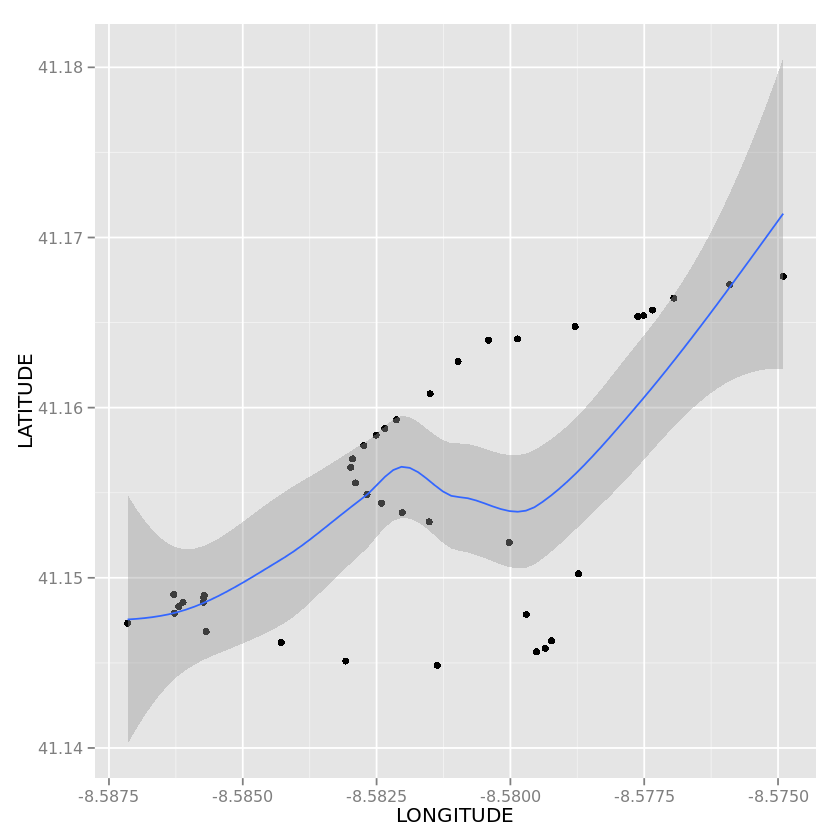

In [16]:
library(ggplot2)
samp_data=coordinates_test[coordinates_test$TRIP_ID == "T3",c("TRIP_ID","LATITUDE","LONGITUDE")]

qplot(LONGITUDE, LATITUDE, data=samp_data, geom = c("point", "smooth"))

In [35]:
#head(coordinates_test,5)
last_location<-coordinates_test[coordinates_test$Status=="Last Observation",c("TRIP_ID","LATITUDE","LONGITUDE")]
head(last_location,5)
dim(last_location)
#dim(test)
write.csv(last_location,file="last_location.csv",row.names=F)

,TRIP_ID,LATITUDE,LONGITUDE
11,T1,41.14662,-8.584884
51,T2,41.1636,-8.601894
91,T3,41.16772,-8.574903
99,T4,41.14098,-8.614638
101,T5,41.14804,-8.619894


[1] 320   3

[1] 320   9